In [1]:
import pandas as pd
%load_ext autoreload
%autoreload 2

In [2]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.mlp_predictor import MLPPredictor as Model
from vol_predict.models.baselines.naive_predictor import (
    NaivePredictor as Baseline,
)

from run import run_backtest, initialize_sequential_runner

In [3]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_sequential_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Available data from 2018-06-04 23:00:00 to 2018-09-30 21:00:00


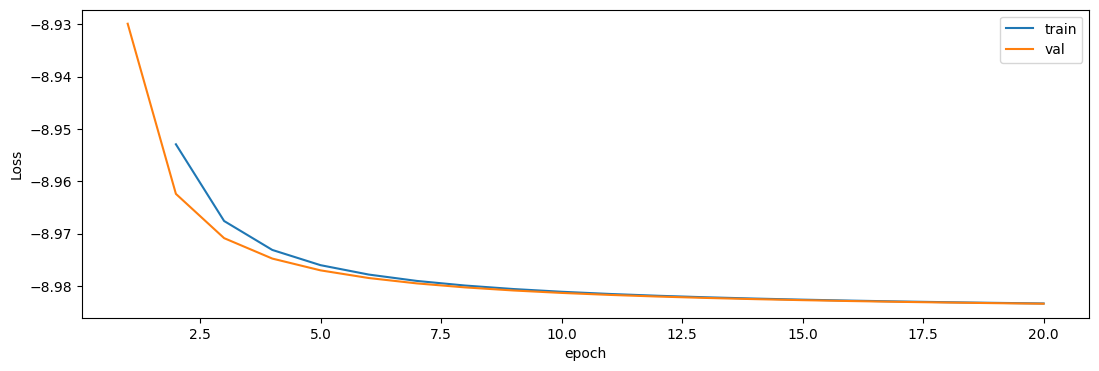

In [4]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 20
runner.model_config.hidden_size = 64
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL
runner.model_config.dropout = 0.20

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [5]:
result

,model_loss,baseline_loss,true_returns,true_vols,model_preds,baseline_preds
datetime,,,,,,
2018-06-30,2.522321,-8.309954,"[-0.0026883667, -0.004259642, 0.0017928587, 0....","[0.00041156381, 0.0004322233, 0.00021497025, 0...","[12.159918, 12.1181965, 12.280439, 12.449789, ...","[0.00023757516, 0.00023757516, 0.00023757516, ..."
2018-07-03,0.601460,-8.035577,[-0.008161686],[0.00024051484],[1.8247142],[0.00024728957]
2018-07-04,-9.026585,-8.120697,"[0.00045824194, 0.001279179, -0.00041435525, 0...","[0.00017250539, 0.00017690947, 0.00018171575, ...","[5.5073175e-05, 5.972207e-05, 6.9735004e-05, 8...","[0.00025311112, 0.00025311112, 0.00025311112, ..."
2018-07-05,5.151340,-8.224091,"[-0.0025450767, 0.0020725208, -0.0004954421, -...","[0.00021121168, 0.0001595019, 0.00016921855, 0...","[178.94846, 179.32523, 182.82175, 178.72784, 1...","[0.00025369268, 0.00025369268, 0.00025369268, ..."
2018-07-06,1.364129,-8.215822,"[0.004517578, -0.0020303084, -0.0006618499, -0...","[7.636556e-05, 6.373772e-05, 0.00017979922, 8....","[4.0155954, 3.8848484, 3.876109, 3.8876188, 3....","[0.00025695117, 0.00025695117, 0.00025695117, ..."
...,...,...,...,...,...,...
2018-09-26,4.304780,-9.147779,"[0.0008025224, -0.0018516219, 0.0015779294, 0....","[1.0667841e-05, 1.7913802e-05, 4.319444e-06, 4...","[74.085304, 75.77787, 72.8088, 74.3709, 74.015...","[9.4598356e-05, 9.4598356e-05, 9.4598356e-05, ..."
2018-09-27,-9.009019,-9.004014,"[0.0025939993, -0.0004280163, -0.003148001, -0...","[1.11729005e-05, 7.5437806e-06, 8.304065e-06, ...","[9.2263734e-05, 0.0001257579, 0.00013577017, 0...","[9.333723e-05, 9.333723e-05, 9.333723e-05, 9.3..."
2018-09-28,1.262855,-9.089924,"[-0.0022302242, 0.00031208308, 0.0011399924, 0...","[4.492918e-05, 1.22871825e-05, 6.9373027e-06, ...","[3.7734733, 3.781587, 3.8901787, 3.8447123, 3....","[9.148046e-05, 9.148046e-05, 9.148046e-05, 9.1..."


In [6]:
import pandas as pd
from sklearn.metrics import root_mean_squared_error

rmse = []
for (date, row) in result.iterrows():
    rmse.append([date, root_mean_squared_error(row.true_vols, row.model_preds), root_mean_squared_error(row.true_vols, row.baseline_preds)])

rmse = pd.DataFrame(rmse, columns=["date", "model", "baseline"]).set_index("date")

In [7]:
rmse.mean(axis=0)

model       43.900082
baseline     0.000150
dtype: float64

In [8]:
rmse.std(axis=0)

model       180.480406
baseline      0.000167
dtype: float64

In [9]:
# result.to_csv("MLP_results.csv")

In [10]:
result.to_csv(f"Daily_Fixed_MLP_results_{runner.model_config.n_epochs}.csv")